In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [9]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
df = pd.read_csv('data1.csv')
df

,input,output
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [11]:
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,10.0


In [12]:
x=df[['input']].values
y=df[['output']].values

In [13]:
x
y

array([[ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.]])

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.4, random_state =35)

In [15]:
Scaler = MinMaxScaler()
Scaler.fit(x_train)

MinMaxScaler()

In [16]:
X_train1 = Scaler.transform(x_train)

In [17]:
#Create the model
ai_brain = Sequential([
    Dense(7,activation='relu'),
    Dense(14,activation='relu'),
    Dense(1)
])

In [18]:
#Compile the model
ai_brain.compile(optimizer = 'rmsprop' , loss = 'mse')

In [19]:
# Fit the model
ai_brain.fit(X_train1 , y_train,epochs = 30)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 24.7979
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 24.4811
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 24.2554
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 24.0688
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 23.9085
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23.7634
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 23.6258
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.4949
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.3703
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.2564
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 23.1464
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 23.0386
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 22.9336
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 22.8303
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 22.7277
Epoch 16/30
1/1 ━━━━━

In [20]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

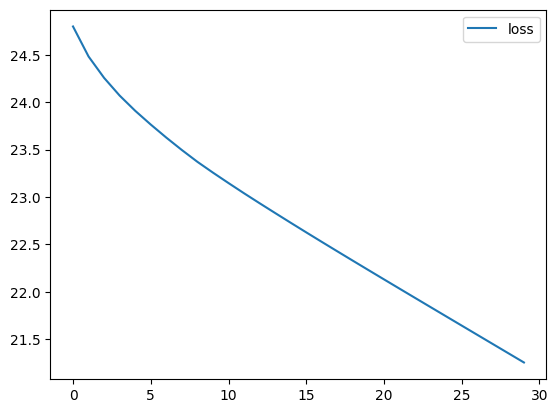

In [21]:
loss_df.plot()

In [22]:
X_test1 =Scaler.transform(x_test)
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 50.8002


50.800167083740234

In [23]:
X_n1=[[11]]
X_n1_1=Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[3.1286995]], dtype=float32)